In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# set figure style
plt.style.use('seaborn-whitegrid')
# random seed for reproducibility
np.random.seed(101)

In [2]:
from sklearn.datasets import load_iris

iris = load_iris()

df = pd.DataFrame(data = iris.data, columns=iris.feature_names)
df['target'] = iris.target
df['class1'] = np.zeros_like(iris.target)
df['class2'] = np.zeros_like(iris.target)
df['class3'] = np.zeros_like(iris.target)

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,class1,class2,class3
0,5.1,3.5,1.4,0.2,0,0,0,0
1,4.9,3.0,1.4,0.2,0,0,0,0
2,4.7,3.2,1.3,0.2,0,0,0,0
3,4.6,3.1,1.5,0.2,0,0,0,0
4,5.0,3.6,1.4,0.2,0,0,0,0


In [3]:
class_1_index = df[df.target == 0].index
class_2_index = df[df.target == 1].index
class_3_index = df[df.target == 2].index

df.loc[class_1_index, "class1"] = 1
df.loc[class_2_index, "class2"] = 1
df.loc[class_3_index, "class3"] = 1

df = df.sample(frac=1)

In [4]:
# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Calculate Logits
def logits(weights, x):
    return np.dot(x, weights)

# Calculate probabilities
def probability(weights, x):
    return sigmoid(logits(weights, x))

def cost_function(weights, x, y, epsilon = 1e-12):
    m = x.shape[0]
    y_hat = probability(weights, x)
    cost = -y * np.log(y_hat + epsilon) - (1 - y) * np.log(1 - y_hat + epsilon)
    cost = (1 / m) * np.sum(cost)
    return cost

def gradient(weights, x, y):
    grad = (1 / x.shape[0]) * np.matmul(x.T, probability(weights, x) - y)
    return grad.flatten()

In [5]:
x_values = df[iris.feature_names].values

X = np.ones((x_values.shape[0], x_values.shape[1] + 1))
X[:, 1:] = x_values

all_targets = []
target_names = ["class1", "class2", "class3"]

for cls in target_names:
    y_values = df[cls].values
    y_values = np.reshape(y_values, (-1, 1))
    all_targets.append(y_values)

all_theta = []
for i in range(len(target_names)):
    theta = np.random.rand(X.shape[1], 1)
    all_theta.append(theta)

In [6]:
from scipy.optimize import fmin_cg

optimized_params = []

for target, theta in zip(all_targets, all_theta):
    optimized_params.append(fmin_cg(cost_function, theta, gradient, args=(X, target.flatten()), disp=True))

print("Optimized parameters : ")
for i, params in enumerate(optimized_params):
    print("Parameters for cls {} and rest {}".format(i + 1, params))

Optimization terminated successfully.
         Current function value: 0.000004
         Iterations: 14
         Function evaluations: 61
         Gradient evaluations: 61
Optimization terminated successfully.
         Current function value: 0.483566
         Iterations: 83
         Function evaluations: 196
         Gradient evaluations: 196
Optimization terminated successfully.
         Current function value: 0.039666
         Iterations: 953
         Function evaluations: 2409
         Gradient evaluations: 2409
Optimized parameters : 
Parameters for cls 1 and rest [ 1.6262538   1.70350303  5.96630073 -9.61207693 -3.9698846 ]
Parameters for cls 2 and rest [ 7.37618753 -0.24551263 -2.79565687  1.31373635 -2.77821455]
Parameters for cls 3 and rest [-43.52428519  -2.46142415  -6.76440785   9.56418883  18.54578726]


In [7]:
c1 = probability(optimized_params[0], X)
c2 = probability(optimized_params[1], X)
c3 = probability(optimized_params[2], X)

pred = []
for probs in zip(c1, c2, c3):
    pred.append(np.argmax(probs))

In [8]:
from sklearn.metrics import classification_report

print(classification_report(df['target'].values, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.98      0.96      0.97        50
           2       0.96      0.98      0.97        50

    accuracy                           0.98       150
   macro avg       0.98      0.98      0.98       150
weighted avg       0.98      0.98      0.98       150



In [9]:
means = np.mean(X, axis=0)

features = X
features[:, 1] = means[1]
features[:, 2] = means[2]

c1 = optimized_params[0]
c2 = optimized_params[1]
c3 = optimized_params[2]

val = np.array([min(features[:, 3]), max(features[:, 3])])

In [10]:
x2_1 = -(c1[0] + c1[1] * means[1] + c1[2] * means[2] + c1[3] * val) / c1[4]
x2_2 = -(c2[0] + c2[1] * means[1] + c2[2] * means[2] + c2[3] * val) / c2[4]
x2_3 = -(c3[0] + c3[1] * means[1] + c3[2] * means[2] + c3[3] * val) / c3[4]

<IPython.core.display.Javascript object>


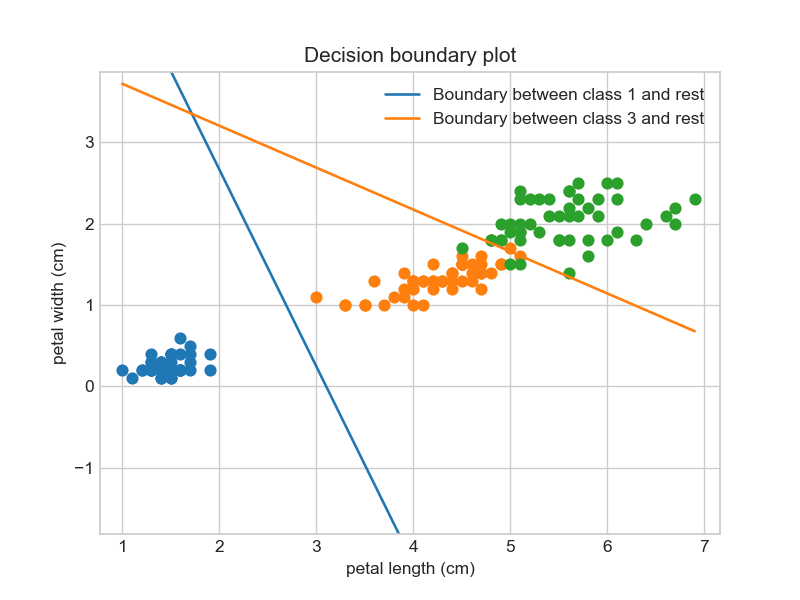

In [11]:
%matplotlib notebook

plt.scatter(df[df.target == 0]["petal length (cm)"], df[df.target == 0]["petal width (cm)"])
plt.scatter(df[df.target == 1]["petal length (cm)"], df[df.target == 1]["petal width (cm)"])
plt.scatter(df[df.target == 2]["petal length (cm)"], df[df.target == 2]["petal width (cm)"])
plt.plot(val, x2_1, label="Boundary between class 1 and rest")
plt.plot(val, x2_3, label="Boundary between class 3 and rest")
plt.xlabel("petal length (cm)")
plt.ylabel("petal width (cm)")
plt.title("Decision boundary plot")
plt.legend()